## Homework

> Note: sometimes your answer doesn't match one of the options exactly.
> That's fine.
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0 

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

### Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
- Make sure that the target value `converted` is not in your dataframe.

### Question 3

- Calculate the mutual information score between `converted` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `industry`
- `location`
- `lead_source`
- `employment_status`

### Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94

### Question 5

- Let's find the least useful feature using the _feature elimination_ technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.

### Question 6

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

## Submit the results

- Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw03
- If your answer doesn't match options exactly, select the closest one


In [1]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.model_selection import train_test_split

## import data
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

In [2]:
## Loading data
df = pd.read_csv("course_lead_scoring.csv")

print("#### checking data types ####")
print(df.dtypes)

#### checking data types ####
lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object


In [3]:

print("#### checking null ####")
print(df.isna().sum()) # number of null values

# prepare data
for feature in df.columns:
    # impute numerical features
    if df[feature].dtype == 'int64':
        df[feature] = df[feature].fillna(0)
    elif df[feature].dtype == 'float64':
        df[feature] = df[feature].fillna(0.0)
    # impute categorical features
    elif df[feature].dtype == 'object':
        df[feature] = df[feature].fillna('NA')
print("#### after transforming #####")
print(df.isna().sum())


#### checking null ####
lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64
#### after transforming #####
lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


In [4]:
### question 1 find the mode of the column `industry`
print(df.industry.mode()[0])

retail


In [5]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                     1.000          0.023   
annual_income                                0.023          1.000   
interaction_count                           -0.019          0.039   
lead_score                                  -0.017          0.022   

                          interaction_count  lead_score  
number_of_courses_viewed             -0.019      -0.017  
annual_income                         0.039       0.022  
interaction_count                     1.000       0.006  
lead_score                            0.006       1.000  


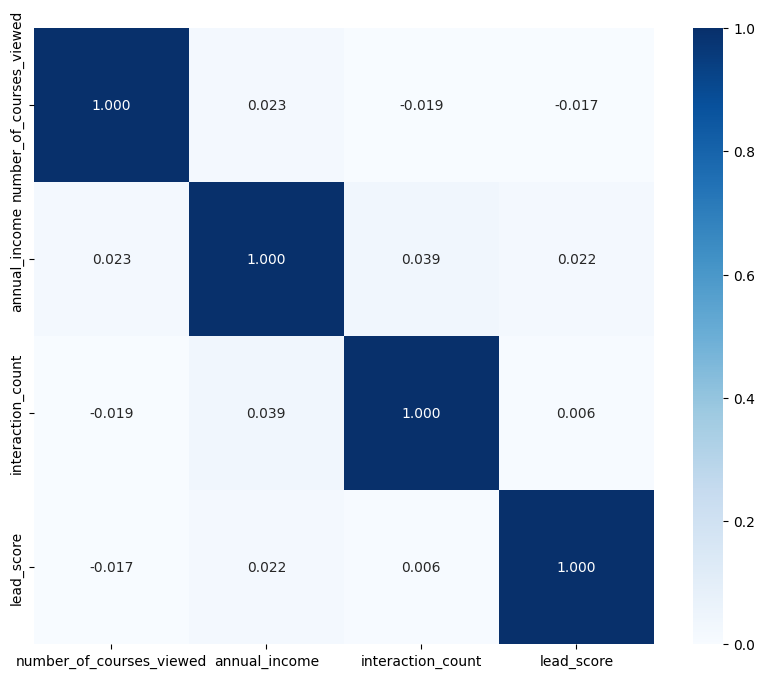

In [6]:
### question 2 find the correlation of numerical features 
num_cols = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
corr_matrix = df[num_cols].corr(method="spearman").round(3)
print(corr_matrix)

# plot the colored heatmap method 1
# corr_matrix.style.background_gradient(cmap="Greens")
# plot the corr distribution
# pd.plotting.scatter_matrix(corr_matrix, figsize=(8,8)

# plot the colored heatmap method 2
plt.figure(figsize=(10,8)) #width,height
sns.heatmap(corr_matrix, cmap="Blues", vmin=0, vmax=1, annot=True, fmt="0.3f")
plt.show()

In [7]:
### to find the pair with highest correlation

# Step 1: unstack the matrix to pairwise correlations
corr_pairs = corr_matrix.unstack()

# Step 2: rename the Series to "correlation" 
corr_pairs.name = "correlation"

# Step 3: reset index to turn tuples into columns**
corr_pairs = corr_pairs.reset_index()

# Step 4: remove self correlations
bool_mask = corr_pairs["level_0"] != corr_pairs["level_1"]
corr_pairs = corr_pairs[bool_mask]

# Step 5: remove duplicate pairs 
# sort variable names and keep only one pair per unqiue combination
corr_pairs["sorted_vars"] = corr_pairs.apply(
    lambda row: tuple(sorted([row["level_0"],row["level_1"]])), axis=1
    )
# drop duplicates by keeping the first occurrence of each sorted pair
corr_pairs = corr_pairs.drop_duplicates(subset="sorted_vars")

# Step 6: sort df by correlation (desc) and reset index
corr_pairs.sort_values(by="correlation", ascending=False).reset_index(drop=True)



,level_0,level_1,correlation,sorted_vars
0,annual_income,interaction_count,0.039,"(annual_income, interaction_count)"
1,number_of_courses_viewed,annual_income,0.023,"(annual_income, number_of_courses_viewed)"
2,annual_income,lead_score,0.022,"(annual_income, lead_score)"
3,interaction_count,lead_score,0.006,"(interaction_count, lead_score)"
4,number_of_courses_viewed,lead_score,-0.017,"(lead_score, number_of_courses_viewed)"
5,number_of_courses_viewed,interaction_count,-0.019,"(interaction_count, number_of_courses_viewed)"


In [8]:
### question 3
target = 'converted'
X = df.drop(columns=[target], axis=1)
y = df[target]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [9]:
### question 3 extract categorical columns
cat_columns = ['lead_source','industry','employment_status','location']

for col in cat_columns:
    # to compute the mutual information score
    MI = mutual_info_score(X_train[col], y_train)
    print(f"{col}: {round(MI,2)}")


lead_source: 0.03
industry: 0.02
employment_status: 0.02
location: 0.0


In [10]:
### question 4 fit the logistic regression model

cat_columns = ['lead_source','industry','employment_status','location']
num_cols = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

dv = DictVectorizer(sparse=False)

X_train_dict = X_train[cat_columns+num_cols].to_dict(orient='records') 
X_train = dv.fit_transform(X_train_dict)

X_val_dict = X_val[cat_columns+num_cols].to_dict(orient='records') 
X_val = dv.transform(X_val_dict)

# fit the model and get the accuracy score
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

lr.fit(X_train,y_train)
model_accuracy = lr.score(X_val,y_val)
print(round(model_accuracy,2))

0.73


In [11]:
### question 5
orig_acc = 0.74
# compute the accuracy by dropping one feature at a time
accuracy = {}


cat_columns = ['lead_source','industry','employment_status','location']
num_cols = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

all_features = cat_columns + num_cols

X_train_df = df.loc[y_train.index, all_features] 
X_val_df = df.loc[y_val.index, all_features]

print("--- Calculating Feature Importance by Dropping One Feature ---")
for feature_to_drop in all_features:
    # 1. Determine the set of features to keep
    remaining_features = [c for c in all_features if c != feature_to_drop]

    # 2. Extract the data with only the remaining features (using original DataFrames)
    X_train_sub = X_train_df[remaining_features]
    X_val_sub = X_val_df[remaining_features]

    # 3. Use DictVectorizer ONLY on the remaining features
    dv_temp = DictVectorizer(sparse=False)
    
    # Convert subsetted DataFrames to dictionaries and transform
    X_train_trans = dv_temp.fit_transform(X_train_sub.to_dict(orient='records'))
    
    # Use transform, not fit_transform, on the validation set
    X_val_trans = dv_temp.transform(X_val_sub.to_dict(orient='records'))

    # 4. Retrain the model
    # Maintain stability settings from previous questions
    lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    lr.fit(X_train_trans, y_train)

    # 5. Compute the new accuracy score
    acc = lr.score(X_val_trans, y_val)
    diff = acc - orig_acc

    # 6. Attach the difference to the dictionary
    accuracy[feature_to_drop] = diff
    print(f"Dropping '{feature_to_drop}': New Acc={acc:.4f}, Diff={diff:.4f}")

# 7. Print the final results in a DataFrame
print("\n--- Final Results (Accuracy Difference) ---")
accu_full = pd.DataFrame(accuracy.items(), columns=['Feature', 'Accuracy Difference'])

keys = ['industry', 'lead_source', 'employment_status']
accu_filtered = accu_full[accu_full['Feature'].isin(keys)].reset_index(drop=True)

# Sort the results
accu_filtered = accu_filtered.sort_values(by='Accuracy Difference', ascending=True)

print(accu_filtered)

--- Calculating Feature Importance by Dropping One Feature ---
Dropping 'lead_source': New Acc=0.7278, Diff=-0.0122
Dropping 'industry': New Acc=0.7332, Diff=-0.0068
Dropping 'employment_status': New Acc=0.7291, Diff=-0.0109
Dropping 'location': New Acc=0.7319, Diff=-0.0081
Dropping 'number_of_courses_viewed': New Acc=0.6293, Diff=-0.1107
Dropping 'annual_income': New Acc=0.8482, Diff=0.1082
Dropping 'interaction_count': New Acc=0.6936, Diff=-0.0464
Dropping 'lead_score': New Acc=0.7332, Diff=-0.0068

--- Final Results (Accuracy Difference) ---
             Feature  Accuracy Difference
0        lead_source            -0.012230
2  employment_status            -0.010862
1           industry            -0.006758


In [12]:
# question 6 Find the optimal C

Cs=[0.01, 0.1, 1, 10, 100]
accs = {}

for c in Cs:
    lr = LogisticRegression(
        solver='liblinear',
        C=c,
        max_iter=1000,
        random_state=42)
    lr.fit(X_train_trans, y_train)
    y_pred_val = lr.predict(X_val_trans)
    accuracy = accuracy_score(y_val, y_pred_val)
    accs[c] = round(accuracy, 3)

accs_df = pd.DataFrame(list(accs.items()), columns=['C', 'Accuracy'])
accs_df = accs_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("\n--- Optimal C Found ---")
optimal_c = accs_df.iloc[0]['C']
optimal_acc = accs_df.iloc[0]['Accuracy']

print(f"\nOptimal C: {optimal_c} (Accuracy: {optimal_acc:.3f})")


--- Optimal C Found ---

Optimal C: 0.01 (Accuracy: 0.735)
